In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [269]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [270]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [272]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [273]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [274]:
#see which data is missing
total=train.isnull().sum().sort_values(ascending= False)
total.head()

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

In [348]:
total=test.isnull().sum().sort_values(ascending= False)
total.head()

AgeGroup       86
Fare            1
Family_size     0
title           0
Cabin_yes       0
dtype: int64

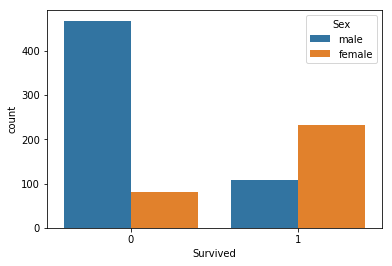

In [275]:
sns.countplot('Survived',hue='Sex',data=train)

In [276]:
survived = train[train['Survived']==1]
not_survived = train[train['Survived']==0]
print("survived :",float(len(survived)))
print("not survived :",float(len(not_survived)))

survived : 342.0
not survived : 549.0


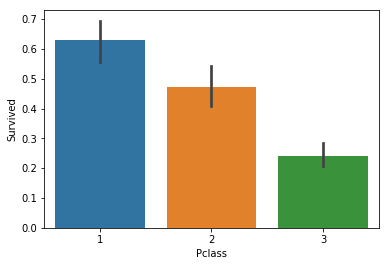

In [277]:
sns.barplot(x='Pclass',y='Survived', data=train)

### People in higher classes had better chances of surviving

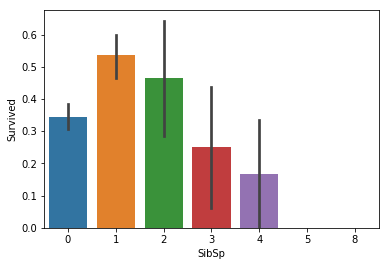

In [278]:
#siblings
sns.barplot(x='SibSp',y='Survived',data=train)

In [279]:
#people with 1 siblings are most likely to survive, with 2 siblings similarily likely,
#however people with no siblings are more likely to suvive than people with 3 or 4 siblings

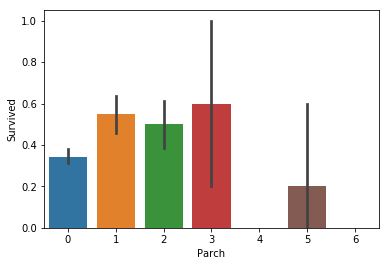

In [280]:
#parents and children
sns.barplot(x='Parch',y='Survived',data=train)

In [281]:
#people with 3 parents or children are most likely to survive, and people travelling alone are not very likely to survive

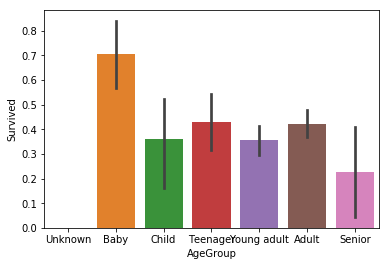

In [282]:
#age feature
train["Age"] = train["Age"].fillna(-1, inplace=False)
test["Age"] = test["Age"].fillna(-1, inplace = False)
#classifying ages with labels to make it easier to visualise
bins = [-1,0, 5, 12, 18, 30, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Young adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup",y="Survived",data=train)

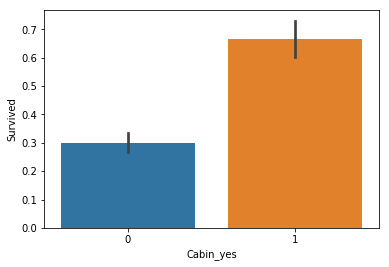

In [283]:
#since most cabin numbers are missing, we shall check if there is a correlation between recorded cabin numbers and the chance of surviving. If not, we can drop it
train['Cabin_yes']= (train["Cabin"].notnull().astype(int))
sns.barplot(x='Cabin_yes',y='Survived',data=train)

In [284]:
#clearly there is a correlation, as more chances of survival are with those who had a cabin number recorded,so we do not need to drop this, will create a new feature using boolean values

In [372]:
test['Cabin_yes']= (test["Cabin"].notnull().astype(int))
test.describe(include="all")

KeyError: 'Cabin'

In [373]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
AgeGroup       332 non-null category
Cabin_yes      418 non-null int64
title          418 non-null float64
Family_size    418 non-null int64
dtypes: category(1), float64(3), int64(7), object(1)
memory usage: 36.8+ KB


In [286]:
#we see that fare has one missing value, age has missing values that we filled with -1, and cabin has around 300 values missing, so we will clean data as much is possible

In [287]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)


In [288]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [289]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_yes
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,889,714,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,6,NaN
top,NaN,NaN,NaN,"Young, Miss. Marie Grice",male,NaN,NaN,NaN,NaN,S,Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644,283,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.600640,0.523008,0.381594,32.204208,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.867496,1.102743,0.806057,49.693429,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,7.910400,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,0.000000


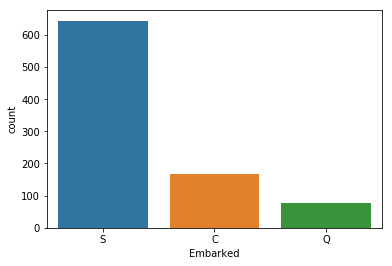

In [290]:
sns.countplot("Embarked", data=train)

In [291]:
#since umber of people embarking in S is most, we will fill in missing values with S value
train= train.fillna({'Embarked':"S"})

In [292]:
#missing values in age feature
combine=[train,test]
for dataset in combine:
    dataset['title']= dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train['title'], train['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [293]:
for dataset in combine:
        dataset['title']= dataset['title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer', 'Rev'],'Rare')
        dataset['title'] = dataset['title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
        dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
        dataset['title'] = dataset['title'].replace('Ms', 'Miss')
        dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
        
train[['title', "Survived"]].groupby("title").count()

,Survived
title,
Master,40
Miss,185
Mr,517
Mrs,126
Rare,20
Royal,3


In [294]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_yes,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Young adult,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,0,1
5,6,0,3,"Moran, Mr. James",male,-1.0,0,0,8.4583,Q,NaN,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adult,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Baby,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Young adult,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Teenager,0,3


In [295]:
grouped = train.groupby(['Sex','Pclass', 'title'])  
# view the median Age by the grouped features 
grouped.Age.median()
grouped = test.groupby(['Sex','Pclass', 'title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  title
female  1       0.0      39.0
                2.0      32.0
                3.0      48.0
        2       2.0      19.5
                3.0      29.0
        3       2.0      17.0
                3.0      22.0
male    1       1.0      40.0
                4.0       9.5
                6.0      53.0
        2       1.0      27.0
                4.0       5.0
                6.0      35.5
        3       1.0      21.0
                4.0       6.0
Name: Age, dtype: float64

In [296]:
train.Age = grouped.Age.apply(lambda x: x.replace(-1.0,(x.median())))
test.Age = grouped.Age.apply(lambda x: x.replace(-1.0,(x.median())))
train.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
test.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [297]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_yes,title
0,1,0,3,"Braund, Mr. Owen Harris",male,34.5,1,0,7.2500,S,Young adult,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,47.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,62.0,0,0,7.9250,S,Young adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,53.1000,S,Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,22.0,0,0,8.0500,S,Adult,0,1
5,6,0,3,"Moran, Mr. James",male,14.0,0,0,8.4583,Q,NaN,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,30.0,0,0,51.8625,S,Adult,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,26.0,3,1,21.0750,S,Baby,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,18.0,0,2,11.1333,S,Young adult,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,21.0,1,0,30.0708,C,Teenager,0,3


In [298]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_yes,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Adult,0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult,0,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior,0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Young adult,0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Young adult,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,Teenager,0,1.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,Young adult,0,2.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,Young adult,0,1.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,Teenager,0,3.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,Young adult,0,1.0


In [356]:
train['Family_size']= train.Parch+train.SibSp+1
test['Family_size']= train.Parch+train.SibSp+1
test['Fare'].fillna(test['Fare'].mean())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

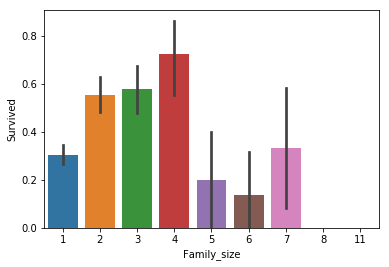

In [357]:
sns.barplot(x='Family_size',y='Survived',data=train)

In [358]:
train.drop("Name",axis=1, inplace=True)
test.drop("Name",axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [302]:
#making dummy variables so that we can make Pclass, sex, Embarked, age group into numerical values
train['Sex'] = train['Sex'].map({'male':1, 'female':0})
test['Sex'] = test['Sex'].map({'male':1, 'female': 0})
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_yes,title,Family_size
0,892,3,1,34.5,0,0,7.8292,Q,Adult,0,1.0,2
1,893,3,0,47.0,1,0,7.0000,S,Adult,0,3.0,2
2,894,2,1,62.0,0,0,9.6875,Q,Senior,0,1.0,1
3,895,3,1,27.0,0,0,8.6625,S,Young adult,0,1.0,2
4,896,3,0,22.0,1,1,12.2875,S,Young adult,0,3.0,1


In [361]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_yes,title,Family_size
0,1,0,3,1,34.5,1,0,7.2500,S,Young adult,0,1,2
1,2,1,1,0,47.0,1,0,71.2833,C,Adult,1,3,2
2,3,1,3,0,62.0,0,0,7.9250,S,Young adult,0,2,1
3,4,1,1,0,27.0,1,0,53.1000,S,Adult,1,3,2
4,5,0,3,1,22.0,0,0,8.0500,S,Adult,0,1,1
5,6,0,3,1,14.0,0,0,8.4583,Q,NaN,0,1,1
6,7,0,1,1,30.0,0,0,51.8625,S,Adult,1,1,1
7,8,0,3,1,26.0,3,1,21.0750,S,Baby,0,4,5
8,9,1,3,0,18.0,0,2,11.1333,S,Young adult,0,3,3
9,10,1,2,0,21.0,1,0,30.0708,C,Teenager,0,3,2


In [362]:
pclass_dummies = pd.get_dummies(train['Pclass'], prefix="Pclass")
title_dummies = pd.get_dummies(train['title'], prefix="Title")
embarked_dummies = pd.get_dummies(train['Embarked'], prefix="Embarked")
ageGroup_dummies = pd.get_dummies(train['AgeGroup'], prefix="AgeGroup")
train_dummies = pd.concat([train, pclass_dummies, title_dummies, ageGroup_dummies, embarked_dummies], axis=1)


train_dummies.drop(['Pclass', 'title', 'Embarked','AgeGroup'], axis=1, inplace=True)


train_dummies.drop('Age', axis=1, inplace=True)
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
PassengerId             891 non-null int64
Survived                891 non-null int64
Sex                     891 non-null int64
SibSp                   891 non-null int64
Parch                   891 non-null int64
Fare                    891 non-null float64
Cabin_yes               891 non-null int64
Family_size             891 non-null int64
Pclass_1                891 non-null uint8
Pclass_2                891 non-null uint8
Pclass_3                891 non-null uint8
Title_1                 891 non-null uint8
Title_2                 891 non-null uint8
Title_3                 891 non-null uint8
Title_4                 891 non-null uint8
Title_5                 891 non-null uint8
Title_6                 891 non-null uint8
AgeGroup_Unknown        891 non-null uint8
AgeGroup_Baby           891 non-null uint8
AgeGroup_Child          891 non-null uint8
AgeGroup_Teenager       891 non-n

In [363]:
pclass_dummies = pd.get_dummies(test['Pclass'], prefix="Pclass")
title_dummies = pd.get_dummies(test['title'], prefix="Title")
embarked_dummies = pd.get_dummies(test['Embarked'], prefix="Embarked")
ageGroup_dummies = pd.get_dummies(test['AgeGroup'], prefix="AgeGroup")
test_dummies = pd.concat([test, pclass_dummies, title_dummies, ageGroup_dummies, embarked_dummies], axis=1)


test_dummies.drop(['Pclass', 'title', 'Embarked','AgeGroup'], axis=1, inplace=True)

test_dummies.drop('Age', axis=1, inplace=True)



In [370]:
test_dummies.head()

,PassengerId,Sex,SibSp,Parch,Fare,Cabin_yes,Family_size,Pclass_1,Pclass_2,Pclass_3,...,AgeGroup_Unknown,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Young adult,AgeGroup_Adult,AgeGroup_Senior,Embarked_C,Embarked_Q,Embarked_S
0,892,1,0,0,7.8292,0,2,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,893,0,1,0,7.0000,0,2,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,894,1,0,0,9.6875,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,895,1,0,0,8.6625,0,2,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,896,0,1,1,12.2875,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [371]:
total=test_dummies.isnull().sum().sort_values(ascending= False)
total.head()
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 26 columns):
PassengerId             418 non-null int64
Sex                     418 non-null int64
SibSp                   418 non-null int64
Parch                   418 non-null int64
Fare                    418 non-null float64
Cabin_yes               418 non-null int64
Family_size             418 non-null int64
Pclass_1                418 non-null uint8
Pclass_2                418 non-null uint8
Pclass_3                418 non-null uint8
Title_0.0               418 non-null uint8
Title_1.0               418 non-null uint8
Title_2.0               418 non-null uint8
Title_3.0               418 non-null uint8
Title_4.0               418 non-null uint8
Title_6.0               418 non-null uint8
AgeGroup_Unknown        418 non-null uint8
AgeGroup_Baby           418 non-null uint8
AgeGroup_Child          418 non-null uint8
AgeGroup_Teenager       418 non-null uint8
AgeGroup_Young adult    418 non-n

### Splitting training data and testing it against different models to get best accuracy

In [322]:
from sklearn.model_selection import train_test_split

predictors= train_dummies.drop(["Survived", "PassengerId"], axis=1)
target = train_dummies["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 42)


In [324]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg=LogisticRegression()
logreg.fit(x_train, y_train)
y_pred= logreg.predict(x_val)
accuracy= round(accuracy_score(y_pred,y_val)*100,2)
print(accuracy)

80.2


/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [325]:
#Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.22


/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [326]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)


81.73


/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [327]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

80.2


### Comparing accuracy we get the best accuracy for Random forest, so we will use this to work and check on test data

In [367]:
del train_dummies['PassengerId']

#X_train = train_dataset.drop("Survived",axis=1).as_matrix()
#Y_train = train_dataset["Survived"].as_matrix()
#X_test  = test_dataset.drop("PassengerId",axis=1).copy().as_matrix()

X_train = train_dummies.drop("Survived",axis=1)
Y_train = train_dummies["Survived"]
X_test  = test_dummies.drop("PassengerId",axis=1).copy()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

KeyError: 'PassengerId'

In [375]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

seed= 42
random_forest =RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, 
                           n_jobs=1, random_state=seed,verbose=0)

random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

result_train = random_forest.score(X_train, Y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()

print('taring score = %s , while validation score = %s' %(result_train , result_val))


taring score = 0.8417508417508418 , while validation score = 0.8282951159076909


In [377]:
submission = pd.DataFrame({
        "PassengerId": test_dummies["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)
print('Exported')

Exported
